In [ ]:
# Import necessary libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score


In [2]:

# Load Breast Cancer Dataset (Classification Task)
cancer = datasets.load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

# Load California Housing Dataset (Regression Task)
housing = datasets.fetch_california_housing()
X_housing, y_housing = housing.data, housing.target

# Print dataset shapes
print("Breast Cancer Dataset Shape:", X_cancer.shape)
print("California Housing Dataset Shape:", X_housing.shape)


Breast Cancer Dataset Shape: (569, 30)
California Housing Dataset Shape: (20640, 8)


In [3]:

# Split data into training and testing sets (80/20 split)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42)

# Scale features (important for numerical stability)
scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

X_train_housing = scaler.fit_transform(X_train_housing)
X_test_housing = scaler.transform(X_test_housing)

print("Data preprocessing complete!")


Data preprocessing complete!


In [4]:

# Train Decision Tree Classifier for Breast Cancer Prediction
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_cancer, y_train_cancer)

# Predict on test set
y_pred_cancer = clf.predict(X_test_cancer)

# Compute accuracy
accuracy = accuracy_score(y_test_cancer, y_pred_cancer)
print(f"Breast Cancer Classification Accuracy: {accuracy:.4f}")

# Generate confusion matrix and classification report
conf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)
class_report_cancer = classification_report(y_test_cancer, y_pred_cancer)
print("Confusion Matrix:\n", conf_matrix_cancer)
print("Classification Report:\n", class_report_cancer)


Breast Cancer Classification Accuracy: 0.9123
Confusion Matrix:
 [[39  3]
 [ 7 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



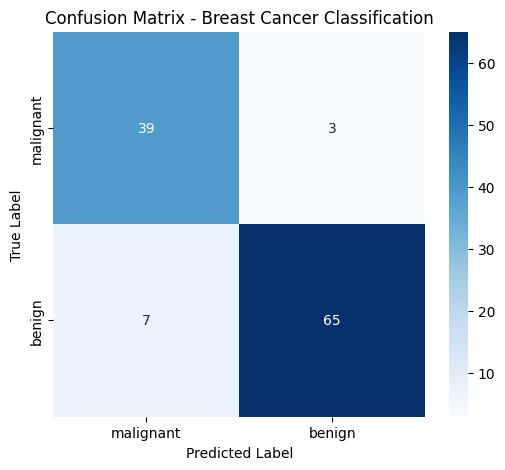

In [5]:

# Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_cancer, annot=True, fmt="d", cmap="Blues", xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Breast Cancer Classification")
plt.show()


In [6]:

# Train Decision Tree Regressor for House Price Prediction
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_housing, y_train_housing)

# Predict on test set
y_pred_housing = regressor.predict(X_test_housing)

# Compute regression metrics
mse = mean_squared_error(y_test_housing, y_pred_housing)
r2 = r2_score(y_test_housing, y_pred_housing)
print(f"California Housing Prediction - MSE: {mse:.4f}, R^2 Score: {r2:.4f}")


California Housing Prediction - MSE: 0.4984, R^2 Score: 0.6196


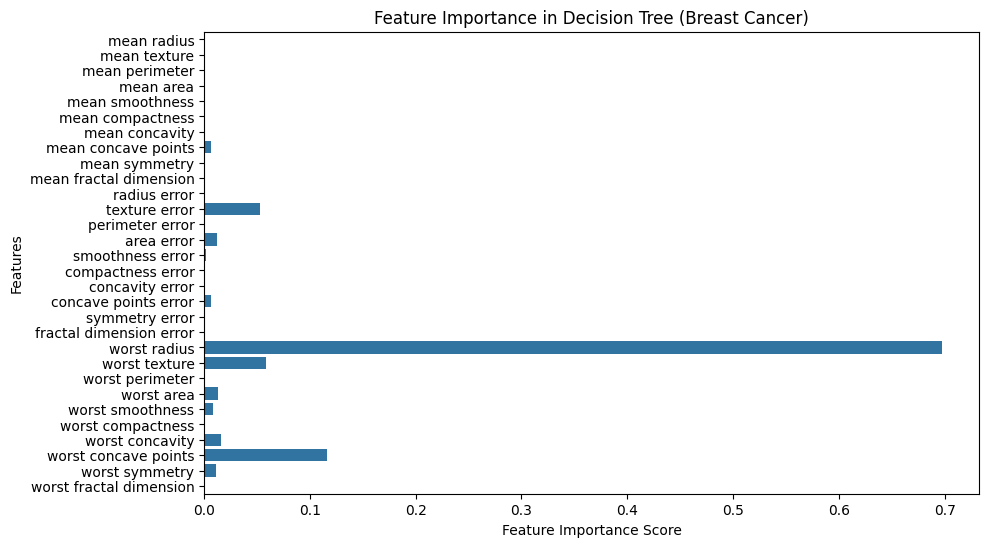

In [7]:

# Feature Importance Plot (Breast Cancer)
plt.figure(figsize=(10,6))
sns.barplot(x=clf.feature_importances_, y=cancer.feature_names)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree (Breast Cancer)")
plt.show()


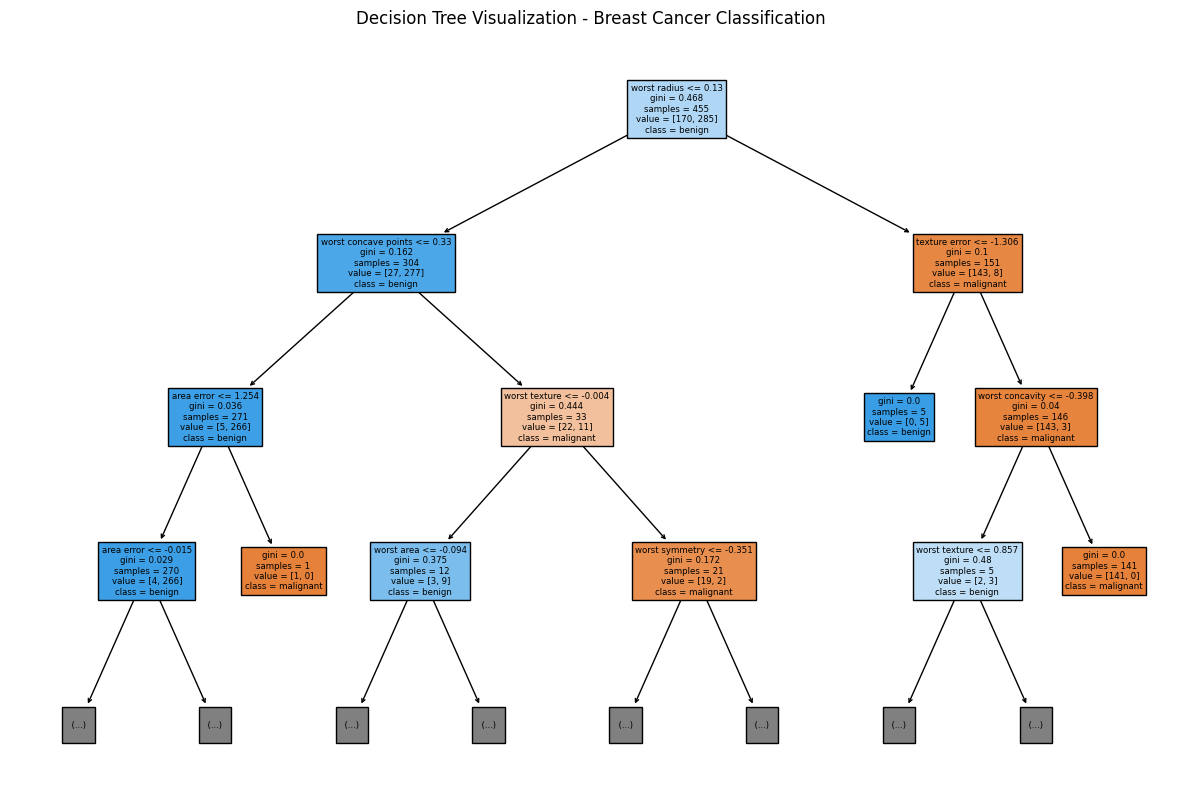

In [8]:

# Plot Decision Tree for Breast Cancer Classification
plt.figure(figsize=(15,10))
plot_tree(clf, feature_names=cancer.feature_names, class_names=cancer.target_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization - Breast Cancer Classification")
plt.show()


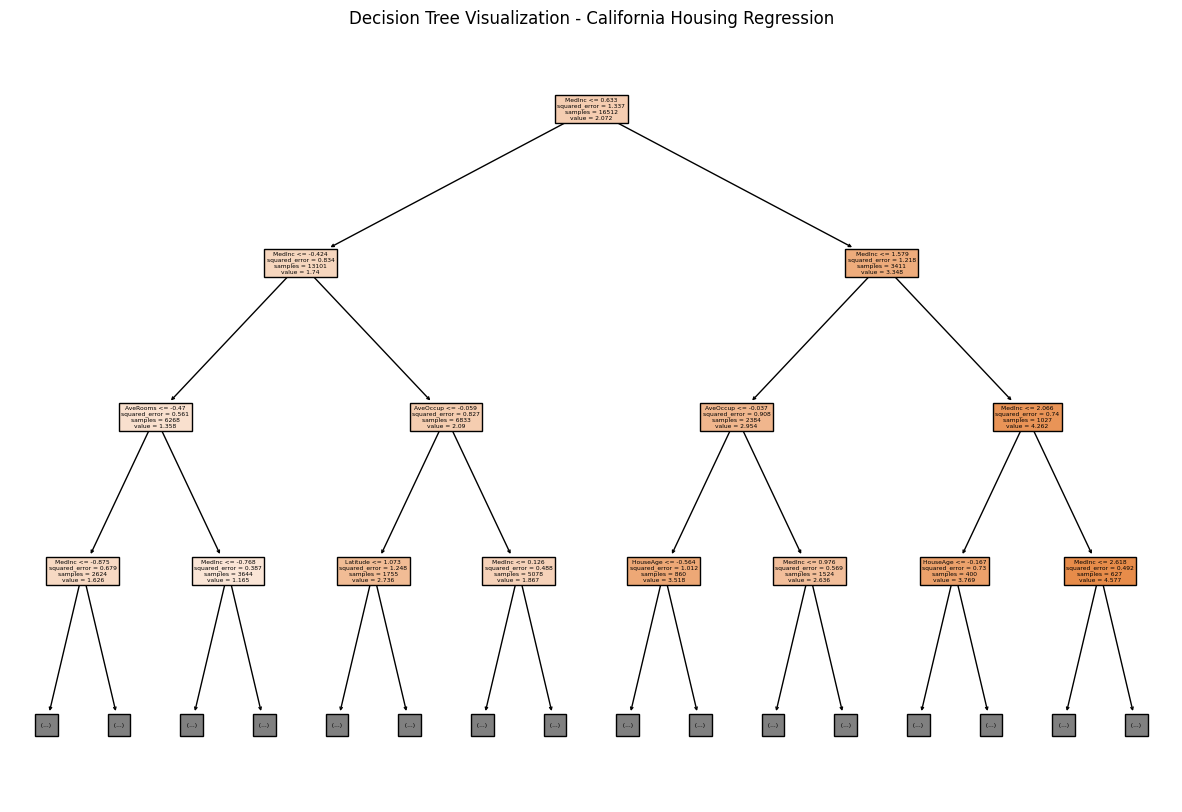

In [9]:

# Plot Decision Tree for Regression
plt.figure(figsize=(15,10))
plot_tree(regressor, feature_names=housing.feature_names, filled=True, max_depth=3)
plt.title("Decision Tree Visualization - California Housing Regression")
plt.show()


In [10]:

# Hyperparameter Tuning for Classification Tree
param_grid_clf = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_clf, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train_cancer, y_train_cancer)

best_clf = grid_search_clf.best_estimator_
print("Best Parameters (Classifier):", grid_search_clf.best_params_)


Best Parameters (Classifier): {'max_depth': 5, 'min_samples_split': 5}
